<center>

$\huge \textbf{ Introduction to Feature Engineering}$

</center>


#### Feature Engineering focuses on creating new variables or features from existing data to enhance the performance of machine learning models. This includes tasks such as feature extraction, feature scaling and feature selection.


# Prerequisites
 Knowledge of following topics are a must:
 - Pandas, NumPy python libraries.
 - Data, Dataset and their importance in training the machine learning model.
 - Supervised, unsupervised ML models.

# Learning
After reading this chapter, you will gain insight on:

- What are features and feature engineering? Why is feature engineering important?

- Types of sources of data.

- Feature types and their characteristics.

## Feature

By now, you must have understood the importance of __features__ in a dataset. In brief, features, aka attributes or variables, are measurable properties present in the dataset that trains ML/DL models. As a result, the good feature set that accurately reflect the problem at hand will lead to better performing Machine Learning solutions.

Importing the required libraries.

In [ ]:
import pandas as pd # for dataframe manipulation
import matplotlib.pyplot as plt # for visualization
import numpy as np

Taking the dataset of _California housing prices_. Here, the columns of the dataset are the features that are labeled at the very top.

In [ ]:
# loading the dataset
house_data = pd.read_csv('./housing_data.csv')
house_data = house_data.drop(columns='Unnamed: 0', axis=1)

# Display the first few rows
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,NaN,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,NaN,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20638 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20631 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB




---



## **Feature Engineering**
When trying to improve the performance of a machine learning model, there are generally three main approaches:



1.  Improve the model – Use a more powerful algorithm or better tuning.

2.  Collect more data – Add more samples to help the model learn better.

3.  Feature Engineering – Transform and prepare the data in a way that makes it easier for the model to understand.

Among these, feature engineering is often the most impactful — especially when collecting more data is not practical. In fact, feature engineering is one of the key techniques that helps top teams **win Kaggle competitions**.



---



## What is Feature Engineering?
Feature Engineering is the process of transforming raw, messy data into meaningful and useful features that improve the model's ability to learn patterns.

In simple terms, think of it like preparing ingredients before cooking:
   - Even if the model is a world-class chef, the outcome won’t be good unless the ingredients (features) are well-prepared — cleaned, chopped, and seasoned properly.




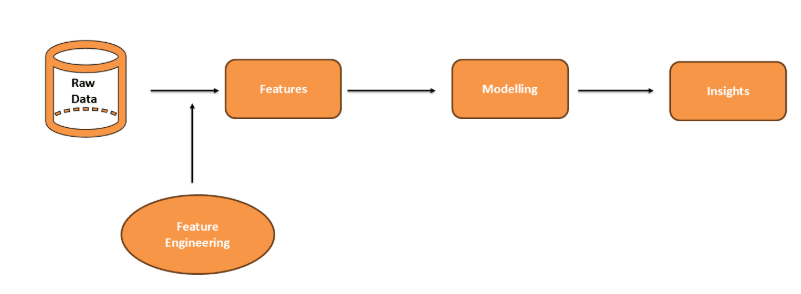

##  Why is Feature Engineering Important?

Feature engineering plays a crucial role in improving the performance of machine learning models. Instead of working with raw or messy data, models benefit greatly when data is structured, meaningful, and informative.

Here’s why feature engineering matters:

- **Enhances Model Accuracy**: Well-crafted features make it easier for models to learn and predict accurately.
- **Reveals Hidden Patterns**: Helps expose relationships that might not be obvious in raw data.
- **Reduces Noise and Complexity**: Simplifies the learning process by removing irrelevant or misleading data.
- **Speeds Up Training**: Cleaner and more relevant data allows models to train faster.
- **Minimizes Overfitting**: By focusing on important signals, it helps models generalize better.
- **Makes Simple Models Perform Well**: Good features can make even basic models competitive.
- **Improves Adaptability**: Useful when model tuning options are limited or computationally expensive.



 ------

## Techniques Present in Feature Engineering
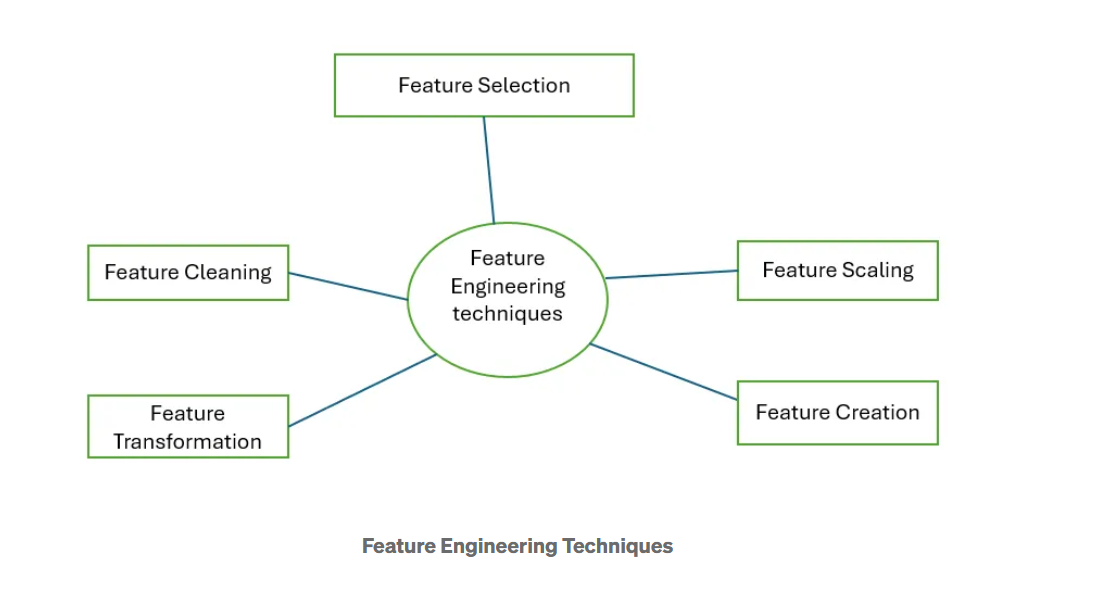




---



## 1. Feature Cleaning
Raw datasets often contain missing values, inconsistent formats, or incorrect entries. Before feeding data into a model, we must clean it to ensure quality and consistency.

**Example Techniques:**


*   Handling missing values.

* Dropping irrelevant columns.

* Fixing incorrect data types.




In [ ]:
# Check for missing values in each column
house_data.isnull().sum()


,0
longitude,2
latitude,0
housing_median_age,0
total_rooms,9
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Fill missing values in 'total_bedrooms' with the median value
house_data['total_bedrooms'] = house_data['total_bedrooms'].fillna(house_data['total_bedrooms'].median())


In [ ]:
# Check for missing values in each column
house_data.isnull().sum()


,0
longitude,2
latitude,0
housing_median_age,0
total_rooms,9
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0




---



## 2. Feature Selection

Feature selection involves identifying and keeping only the most relevant variables (features) for modeling. Irrelevant or redundant features can hurt model performance.

### Why?
* Reduce Overfitting
* Improves model performances
* Makes training faster


## Techniques
* Correlation analysis
* statistical tests
* Domin Knowledge



__Correlation matrix__

Usually correlation matrices are used to compute the correlation between all independent variables of the dataframe. Pandas dataframe's method ```.corr()``` can be used to compute the correlation matrix. The correlation can then be visualized using the heat map. The below heat map shows how some variables are highly correlated such as ```total_rooms``` and ```total_bedrooms```.


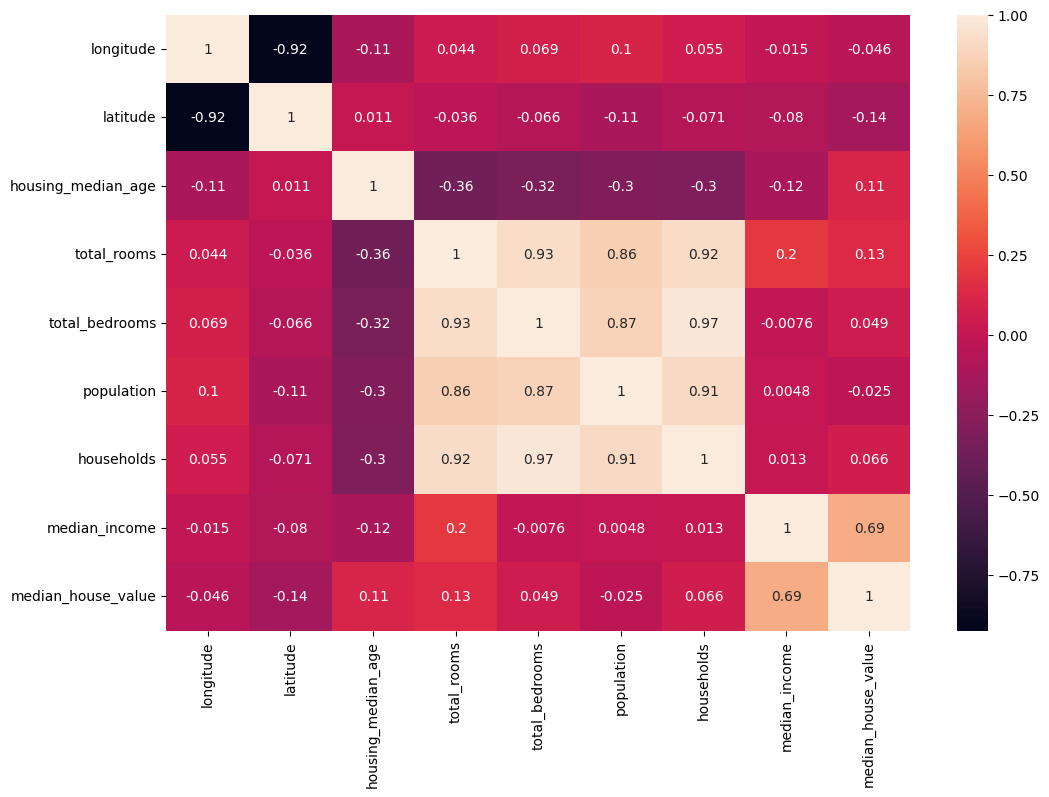

In [ ]:
# Calculate the correlation matrix, only considering numerical columns
correlation_matrix = house_data.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show() # Added plt.show() to display the heatmap



---



## 3. Feature Scaling

Feature Scaling is the process of normalizing or standardizing numerical features so they contribute equally to the model. This is especially important for distance-based models (like KNN or SVM).

Common Techniques:

* Standardization (mean = 0, std = 1)

* Min-Max Scaling (scales to [0,1])

In [ ]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,NaN,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,NaN,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

house_data[numerical_cols] = scaler.fit_transform(house_data[numerical_cols])


In [ ]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,NaN,1.052548,0.982143,-0.804905,-0.972476,-0.974429,-0.977033,2.344766,452600.0,NEAR BAY
1,NaN,1.043185,-0.607019,2.045374,1.357143,0.861439,1.669961,2.332238,358500.0,NEAR BAY
2,-122.24,1.038503,1.856182,-0.535872,-0.827024,-0.820777,-0.843637,1.782699,352100.0,NEAR BAY
3,-122.25,1.038503,1.856182,-0.624328,-0.719723,-0.766028,-0.733781,0.932968,341300.0,NEAR BAY
4,-122.25,1.038503,1.856182,-0.462542,-0.612423,-0.759847,-0.629157,-0.012881,342200.0,NEAR BAY


## 4. Feature Creation
Feature creation involves creating new variables from existing ones that might better capture patterns or relationships in the data.

## Why?
* Can expose hidden signals

* Simplifies relationships for the model

* Improves predictive power


In [ ]:
# New features from existing ones
house_data['rooms_per_household'] = house_data['total_rooms'] / house_data['households']
house_data['bedrooms_per_room'] = house_data['total_bedrooms'] / house_data['total_rooms']
house_data['population_per_household'] = house_data['population'] / house_data['households']


In [ ]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,NaN,1.052548,0.982143,-0.804905,-0.972476,-0.974429,-0.977033,2.344766,452600.0,NEAR BAY,0.823826,1.208188,0.997335
1,NaN,1.043185,-0.607019,2.045374,1.357143,0.861439,1.669961,2.332238,358500.0,NEAR BAY,1.224803,0.663519,0.515844
2,-122.24,1.038503,1.856182,-0.535872,-0.827024,-0.820777,-0.843637,1.782699,352100.0,NEAR BAY,0.635193,1.543323,0.972904
3,-122.25,1.038503,1.856182,-0.624328,-0.719723,-0.766028,-0.733781,0.932968,341300.0,NEAR BAY,0.850836,1.152797,1.043946
4,-122.25,1.038503,1.856182,-0.462542,-0.612423,-0.759847,-0.629157,-0.012881,342200.0,NEAR BAY,0.735177,1.324038,1.207722




---



## 5. Feature Transformation
Some features are skewed or span large ranges. Transforming them helps the model better capture their impact.

Common Techniques:
* Log Transformation (for right-skewed data)

* Square Root / Power Transform

* Box-Cox (for normalizing)



In [ ]:
# Log transformation for skewed data
house_data['median_income_log'] = np.log1p(house_data['median_income'])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_income_log
0,NaN,1.052548,0.982143,-0.804905,-0.972476,-0.974429,-0.977033,2.344766,452600.0,NEAR BAY,0.823826,1.208188,0.997335,1.207397
1,NaN,1.043185,-0.607019,2.045374,1.357143,0.861439,1.669961,2.332238,358500.0,NEAR BAY,1.224803,0.663519,0.515844,1.203644
2,-122.24,1.038503,1.856182,-0.535872,-0.827024,-0.820777,-0.843637,1.782699,352100.0,NEAR BAY,0.635193,1.543323,0.972904,1.023421
3,-122.25,1.038503,1.856182,-0.624328,-0.719723,-0.766028,-0.733781,0.932968,341300.0,NEAR BAY,0.850836,1.152797,1.043946,0.659056
4,-122.25,1.038503,1.856182,-0.462542,-0.612423,-0.759847,-0.629157,-0.012881,342200.0,NEAR BAY,0.735177,1.324038,1.207722,-0.012965




---



# Types of Variables(Features) in a dataset

Knowing what a variable is not enough, we must also keep knowledge of types of variables. In this section, you are learning just that.

<figure>
<img src="https://docs.google.com/uc?export=download&id=1fZ1GYznAcUd5wMrBdtQ369oOu1jWD_eL" alt="Skills of data scientist and data engineer">
</figure>
<center>Figure 2: Types of variables</center>


##  Types of Numerical Variables

The figure above illustrates the major types of variables. Let’s briefly explore **Numerical Variables**, which are values represented by numbers. These are divided into two main types:

---

###  **Discrete Variables**
- Take only **whole number values**
- No fractions or decimals allowed  
- Special case: **Binary variables** (values only 0 or 1)

**Examples**:
- Number of products purchased  
- Video view counts  
- Exam attempts  
- Binary: Yes (1) / No (0), Male (1) / Female (0)

---

###  **Continuous Variables**
- Can take **any numerical value**, including decimals  
- Typically within a defined range

**Examples**:
- Product prices  
- Interest rates  
- River water levels  
- Temperature readings


In [ ]:
#Let's load the california_housing dataset with few columns

old_age = np.array((house_data.housing_median_age > 50).astype(int))
cols = ['housing_median_age', 'population', 'median_income', 'latitude', 'ocean_proximity']
house_data = house_data[cols]
house_data['old_age']=old_age
house_data.head(5)


<ipython-input-82-8ddddc94214e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['old_age']=old_age


,housing_median_age,population,median_income,latitude,ocean_proximity,old_age
0,0.982143,-0.974429,2.344766,1.052548,NEAR BAY,0
1,-0.607019,0.861439,2.332238,1.043185,NEAR BAY,0
2,1.856182,-0.820777,1.782699,1.038503,NEAR BAY,0
3,1.856182,-0.766028,0.932968,1.038503,NEAR BAY,0
4,1.856182,-0.759847,-0.012881,1.038503,NEAR BAY,0


Variables ```HouseAge```, ```Population```,```old_age``` are discrete variables with old_age being binary variable and median_income and Latitude are continuous variables.

Text(0, 0.5, 'No.of samples')

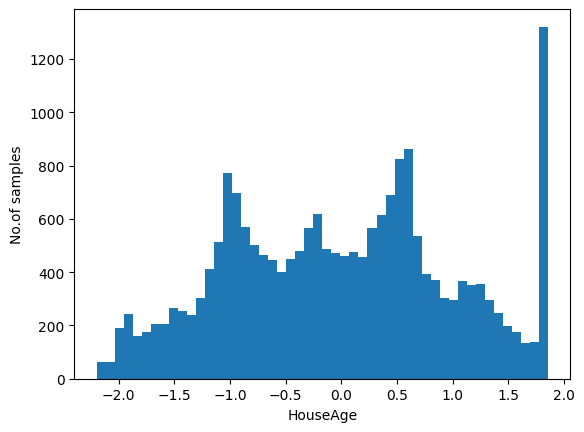

In [ ]:
plt.hist(house_data.housing_median_age, bins=50)
plt.xlabel('HouseAge')
plt.ylabel('No.of samples')

Text(0, 0.5, 'No.of samples')

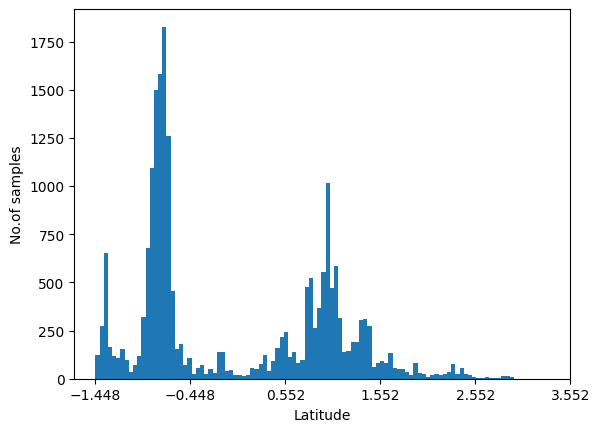

In [ ]:
plt.hist(house_data.latitude, bins=100)
# for better visualization setting x axis to decimal values
plt.xticks(np.arange(min(house_data.latitude), max(house_data.latitude)+1, 1.0))
plt.xlabel('Latitude')
plt.ylabel('No.of samples')

##  Categorical Variables

Categorical variables represent **labels or categories** rather than numerical values. These values **define groups or classes** that data can fall into. They are usually **textual (strings)** but can be encoded into numbers for machine learning models.

Categorical variables are mainly divided into two types:

---

###  **Nominal Variables**
- Represent **names or labels**
- **No natural order** or ranking between categories
- Can't perform mathematical operations on them

**Examples**:
- Colors: Red, Blue, Green  
- Gender: Male, Female  
- Cities: Kathmandu, Pokhara, Dharan  
- Product types: Electronics, Clothing, Furniture

---

###  **Ordinal Variables**
- Categories with a **clear, meaningful order**
- Can be ranked but differences between levels are **not measurable**

**Examples**:
- Education level: High School < Bachelor < Master < PhD  
- Customer satisfaction: Poor < Average < Good < Excellent  
- Movie ratings: 1 Star < 2 Stars < 3 Stars < 4 Stars < 5 Stars

---

In practice, categorical variables are often converted into numerical form using techniques like **One-Hot Encoding**, **Label Encoding**, or **Ordinal Encoding** before feeding into machine learning models.


```Ocean_proximity``` in the above dataset is an example of categorical variables. These variables can be encoded from 0-4 but are still called  categorical variables as the numbers represent a particular case of proximity.

(array([2.290e+03, 0.000e+00, 9.136e+03, 0.000e+00, 0.000e+00, 6.551e+03,
        0.000e+00, 2.658e+03, 0.000e+00, 5.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

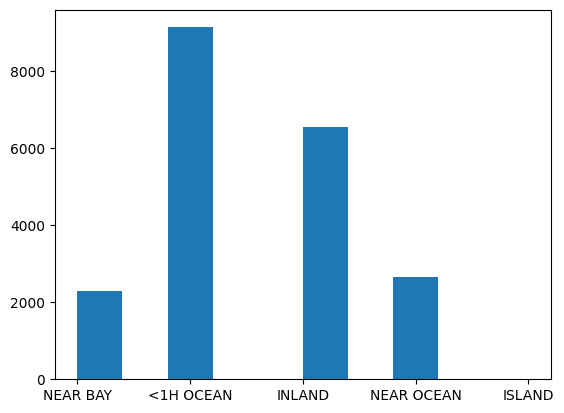

In [ ]:
Proximity = house_data.ocean_proximity

plt.hist(Proximity)



---



### Date/Time Variables

 Even by looking at the names of the variables, you might have already guessed what the values for these variables are. Yes, the values of these variables can be only date, only time, or both date and time.  These variables require special attention as preprocessing of these variables allows users to enrich our dataset a lot. These variables examples are:
  
- Date of Birth. (1997-12-18, Dec-18 1997)
- Time of accidents (19:08:23, 07:08:23 PM)

From a Peer to peer, lending club finance dataset, the below tables show date/time variables - essential date variables in two different formats.

<figure>
<img src="https://docs.google.com/uc?export=download&id=1BWFSP_NPArj_anr327ifzHo8zimcTojI" alt="Skills of data scientist and data engineer">
</figure>




---



### Mixed Variables
  Mixed Variables have values that can be either number or labels(categories) or number and category together as the values. These variables can also enrich the dataset, so extracting information from the number of labels from the dataset is helpful. Examples for these variables are:
  
- bar code numbers
- vehicle registration numbers



---



###  Cardinality

In the context of **categorical variables**, **cardinality** refers to the number of **unique labels or distinct values** a feature contains.

High cardinality means a feature has a large number of unique values — for example:
-  `product_id` in an e-commerce dataset
-  `user_id` or `email` in user logs
-  `city_name` in a global dataset

####  Why is High Cardinality a Problem?

- **Uneven Data Distribution**: High-cardinality features can lead to a situation where some categories appear only in the training set but not in the test set, or vice versa.
  
- **Overfitting Risk**: Categories present only in the training set may cause the model to overfit — learning patterns that don’t generalize well.

- **Operational Issues**: If the model encounters a new, unseen category during prediction (e.g., in the test or production data), it won’t know how to handle it.

- **Dominance of Frequent Labels**: Some labels may appear very frequently, while others occur rarely. This imbalance causes models (especially tree-based models) to give more importance to dominant categories, ignoring the less frequent ones.

####  Solution:

High-cardinality features should be **transformed or encoded** into **lower cardinality** using various **feature engineering techniques**, such as:
- Grouping rare labels
- Target encoding
- Frequency encoding
- Embedding techniques (especially in deep learning)

Proper handling of high-cardinality variables improves both **model accuracy** and **stability**.


In [ ]:
print('cardinality of ocean proximity in housing dataset',len(house_data.ocean_proximity.unique()))
print('unique features of ocean proximity', house_data.ocean_proximity.unique())

cardinality of ocean proximity in housing dataset 5
unique features of ocean proximity ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


__Scatter plot__

Our simulated example has linear relationship, whereas the california housing dataset's ```total bedroom``` and ```median house``` value target doesn't. This information can easily be seen in the scatter plot.

In [ ]:
print(house_data.columns)

Index(['housing_median_age', 'population', 'median_income', 'latitude',
       'ocean_proximity', 'old_age'],
      dtype='object')


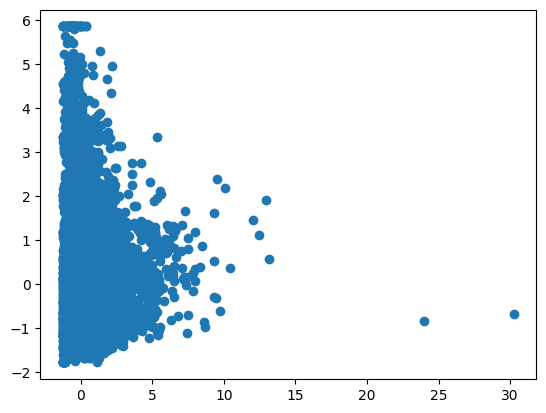

In [ ]:
plt.scatter(house_data["population"], house_data["median_income"])

__Histogram__

 See how the simulated data and housing data differs in distribution of independent variable. Our simulated data corresponds to Gaussian distribution whereas the ```housing_median_age``` of housing dataset doesn't.

<ipython-input-95-4a843cec3259>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['housing_median_age'], bins=30)


<Axes: xlabel='housing_median_age', ylabel='Density'>

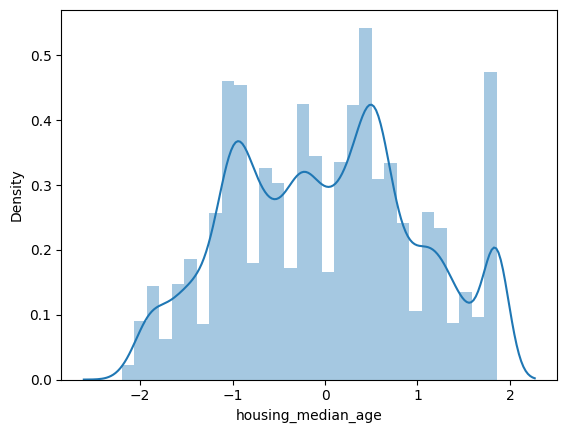

In [ ]:
import seaborn as sns
sns.distplot(house_data['housing_median_age'], bins=30)

###  Outliers

Outliers are data points that differ significantly from the rest of the dataset. According to D. Hawkins:

> "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism."  
> — *Identification of Outliers, Chapman and Hall (1980)*

We won't go into detail here, because a full explanation of outlier detection and treatment is covered in a separate chapter of this module.

What you need to know for now:
- Outliers can sometimes indicate **errors in data recording** or **rare but important events**, like **fraudulent transactions**.
- Deciding whether to remove them depends on the **context** of the problem.

 Below is a simple boxplot image showing outliers in the `total_bedrooms` column from the California Housing dataset.  



<Axes: ylabel='total_bedrooms'>

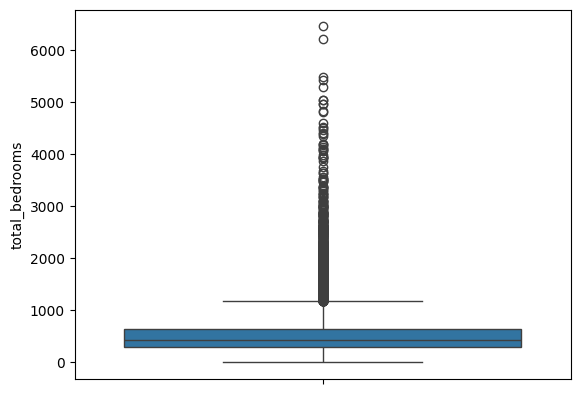

In [104]:
sns.boxplot(y=house_data['total_bedrooms'])


## Rare labels
In categorical variables, **rare labels** are categories that occur **very infrequently** in the dataset.

For example, if you have a `city` feature in your dataset with 100 different cities, some cities might appear **only once or twice**, while others like "New York" or "London" may appear thousands of times.

---

####  Why Are Rare Labels Problematic?

- **Model Confusion**: Rare labels provide too little data for the model to learn any meaningful pattern, which can reduce performance.
- **Overfitting**: Models may overfit to these infrequent categories during training, especially tree-based models.
- **Unseen Labels in Testing/Production**: If a rare label appears only in the test or real-time data and not in the training set, the model won’t know how to handle it.

---

####  How to Handle Rare Labels?

We can group all infrequent categories into a **single new category** like `'Rare'` or `'Other'`. This technique is called **rare label encoding** or **grouping**.

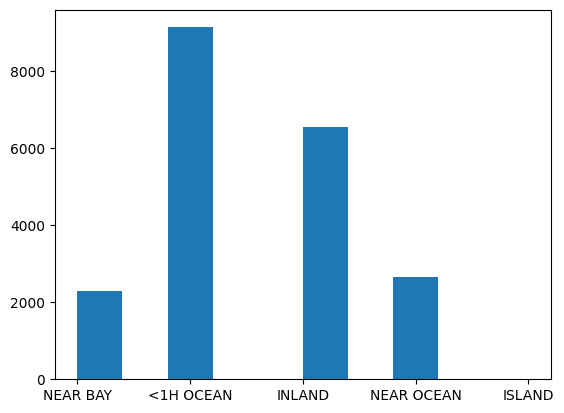

In [ ]:
plt.hist(house_data['ocean_proximity'])
plt.show()